In [ ]:
# Step 1: Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from math import sqrt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
# Step 2: Load and Prepare Data
file_path = "/content
File
..
Tarik file untuk menguploadnya ke penyimpanan sesi.

           Entity  Democracy Index  Military Expenditure
Year
2001-04-01  India            0.726                20617.3
2002-04-01  India            0.727                21207.0
2003-04-01  India            0.728                21791.4
2004-04-01  India            0.729                22532.2
2005-04-01  India            0.730                23522.1

##Step 3: Visualisasi Data Awal
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_India.index, y=df_India["Democracy Index"], marker="o", label="Actual Data")
plt.title("Democracy Index of India Over Time")
plt.xlabel("Year")
plt.ylabel("Democracy Index")
plt.grid(True)
plt.show()

# Step 4: Normalisasi Data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df_India[""].values.reshape(-1, 1))

# Step 5: Membuat Dataset untuk LSTM
def create_sequences(data, time_step=5):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 5
X, y = create_sequences(data_scaled, time_step)

# Ubah dimensi agar sesuai dengan input LSTM
X = X.reshape((X.shape[0], X.shape[1], 1))

# Step 6:Membagi Data Menjadi Training dan Testing
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

#Step 7: Membangun Model LSTM
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation="relu"),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

#Step 8: Melatih Model LSTM
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=16, verbose=1)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 217ms/step - loss: 0.3077 - val_loss: 0.5366
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2030 - val_loss: 0.3590
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.1182 - val_loss: 0.1704
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0602 - val_loss: 0.0284
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0194 - val_loss: 0.0239
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0412 - val_loss: 0.0157
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0249 - val_loss: 0.0159
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0160 - val_loss: 0.0429
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0239 - val_loss: 0.0553
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0199 - val_loss: 0.0452
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0183 - val_loss: 0.0254
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0222 - val_loss: 0.0125
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0196 - val_loss: 0.0119
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0172 - val_loss: 0.0174
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0148 - val_loss: 0.0234
Epoch 16/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0135 - val_loss: 0.0261
Epoch 17/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0187 - val_loss: 0.0202
Epoch 18/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0167 - val_loss: 0.0184
Epoch 19/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0182 - val_loss: 0.0159
Epoch 20/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0138 - val_loss: 0.0172
Epoch 21/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0110 - val_loss: 0.0208
Epoch 22/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0143 - val_loss: 0.0239
Epoch 23/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0175 - val_loss: 0.0262
Epoch 24/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0160 - val_loss: 0.0207
Epoch 25/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0171 - val_loss: 0.0163
Epoch 26/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0144 - val_loss: 0.0140
Epoch 27/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0161 - val_loss: 0.0151
Epoch 28/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0162 - val_loss: 0.0171
Epoch 29/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0173 - val_loss: 0.0185
Epoch 30/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0177 - val_loss: 0.0179
Epoch 31/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0141 - val_loss: 0.0172
Epoch 32/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0116 - val_loss: 0.0201
Epoch 33/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0175 - val_loss: 0.0183
Epoch 34/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0143 - val_loss: 0.0150
Epoch 35/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0128 - val_loss: 0.0136
Epoch 36/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0194 - val_loss: 0.0132
Epoch 37/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0160 - val_loss: 0.0172
Epoch 38/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0139 - val_loss: 0.0187
Epoch 39/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0114 - val_loss: 0.0153
Epoch 40/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0177 - val_loss: 0.0112
Epoch 41/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0165 - val_loss: 0.0135
Epoch 42/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0128 - val_loss: 0.0153
Epoch 43/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0168 - val_loss: 0.0144
Epoch 44/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0130 - val_loss: 0.0148
Epoch 45/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0155 - val_loss: 0.0135
Epoch 46/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0160 - val_loss: 0.0145
Epoch 47/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0133 - val_loss: 0.0144
Epoch 48/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0135 - val_loss: 0.0128
Epoch 49/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0125 - val_loss: 0.0110
Epoch 50/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0162 - val_loss: 0.0106
Epoch 51/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0192 - val_loss: 0.0131
Epoch 52/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0122 - val_loss: 0.0152
Epoch 53/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0157 - val_loss: 0.0128
Epoch 54/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0149 - val_loss: 0.0116
Epoch 55/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0167 - val_loss: 0.0116
Epoch 56/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0144 - val_loss: 0.0161
Epoch 57/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0140 - val_loss: 0.0122
Epoch 58/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0143 - val_loss: 0.0111
Epoch 59/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0162 - val_loss: 0.0107
Epoch 60/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0130 - val_loss: 0.0115
Epoch 61/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0135 - val_loss: 0.0115
Epoch 62/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0135 - val_loss: 0.0113
Epoch 63/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0111 - val_loss: 0.0119
Epoch 64/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0130 - val_loss: 0.0120
Epoch 65/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0115 - val_loss: 0.0121
Epoch 66/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0102 - val_loss: 0.0121
Epoch 67/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 0.0128 - val_loss: 0.0101
Epoch 68/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0143 - val_loss: 0.0100
Epoch 69/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0101 - val_loss: 0.0128
Epoch 70/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0142 - val_loss: 0.0133
Epoch 71/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0117 - val_loss: 0.0110
Epoch 72/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0100 - val_loss: 0.0101
Epoch 73/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0131 - val_loss: 0.0097
Epoch 74/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0109 - val_loss: 0.0133
Epoch 75/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0128 - val_loss: 0.0178
Epoch 76/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0108 - val_loss: 0.0111
Epoch 77/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0115 - val_loss: 0.0097
Epoch 78/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0129 - val_loss: 0.0114
Epoch 79/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0124 - val_loss: 0.0147
Epoch 80/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0130 - val_loss: 0.0136
Epoch 81/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0111 - val_loss: 0.0091
Epoch 82/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0117 - val_loss: 0.0098
Epoch 83/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0127 - val_loss: 0.0094
Epoch 84/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0120 - val_loss: 0.0108
Epoch 85/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0146 - val_loss: 0.0112
Epoch 86/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0125 - val_loss: 0.0097
Epoch 87/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0112 - val_loss: 0.0089
Epoch 88/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0110 - val_loss: 0.0099
Epoch 89/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0116 - val_loss: 0.0088
Epoch 90/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0104 - val_loss: 0.0084
Epoch 91/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0095 - val_loss: 0.0084
Epoch 92/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0108 - val_loss: 0.0083
Epoch 93/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0094 - val_loss: 0.0090
Epoch 94/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0097 - val_loss: 0.0080
Epoch 95/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0100 - val_loss: 0.0082
Epoch 96/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0095 - val_loss: 0.0118
Epoch 97/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0119 - val_loss: 0.0081
Epoch 98/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0101 - val_loss: 0.0073
Epoch 99/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0095 - val_loss: 0.0088
Epoch 100/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0117 - val_loss: 0.0122

Bagian Baru
Bagian Baru

#Step 9: Evaluasi Model
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.legend()
plt.title("Loss Function Over Epochs")
plt.show()

# Step 10: Forecasting Next 10 Years dengan Confidence Interval
future_steps = 10
future_inputs = data_scaled[-time_step:].reshape(1, time_step, 1)

# Simulasi Monte Carlo untuk confidence interval
n_simulations = 100
simulation_results = np.zeros((n_simulations, future_steps))

for i in range(n_simulations):
    temp_inputs = future_inputs.copy()
    temp_preds = []

    for _ in range(future_steps):
        future_pred = model(temp_inputs, training=True)  # Enable dropout during prediction
        future_pred = future_pred.numpy().reshape(1, 1, 1)

        temp_preds.append(future_pred[0, 0])
        temp_inputs = np.append(temp_inputs[:, 1:, :], future_pred, axis=1)

    simulation_results[i, :] = np.array(temp_preds).flatten()

# Hitung rata-rata prediksi & confidence interval
predicted_mean = np.mean(simulation_results, axis=0)
lower_bound = np.percentile(simulation_results, 0.5, axis=0)
upper_bound = np.percentile(simulation_results, 99.5, axis=0)

# Transformasi kembali ke skala aslinya
predicted_mean = scaler.inverse_transform(predicted_mean.reshape(-1, 1)).flatten()
lower_bound = scaler.inverse_transform(lower_bound.reshape(-1, 1)).flatten()
upper_bound = scaler.inverse_transform(upper_bound.reshape(-1, 1)).flatten()

# Buat DataFrame hasil forecast
future_years = pd.date_range(start=df_America.index[-1] + pd.DateOffset(years=1), periods=future_steps, freq='YE')
forecast_df_America = pd.DataFrame({
    "Year": future_years,
    "Military expenditure": predicted_mean,
    "Lower Bound": lower_bound,
    "Upper Bound": upper_bound
})

print(forecast_df_America)

        Year  Military expenditure    Lower Bound    Upper Bound
0 2024-12-31         805799.327727  686268.136140  901126.050208
1 2025-12-31         792226.979946  679480.635378  923628.258887
2 2026-12-31         778633.326994  664556.113641  912020.119837
3 2027-12-31         756948.613859  645591.429087  936211.643501
4 2028-12-31         744304.700823  587028.846221  898424.357004
5 2029-12-31         728826.557548  590146.083801  895011.050445
6 2030-12-31         709859.402707  563918.019872  859399.037217
7 2031-12-31         688010.819402  560193.102161  821518.601829
8 2032-12-31         673803.721391  567094.813501  800936.040043
9 2033-12-31         669602.319729  573345.225833  795939.052864

#Step 11: Visualisasi Hasil Forecasting
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Plot data historis
sns.lineplot(x=df_America.index, y=df_canada["Military expenditure"], marker="o", label="Actual Data", linewidth=2)

# Plot prediksi dengan confidence intervals
sns.lineplot(x=future_years, y=predicted_mean, marker="o", linestyle="dashed", color="red", label="Forecast", linewidth=2)
plt.fill_between(future_years, lower_bound, upper_bound, color='red', alpha=0.2, label="99% Confidence Interval")

# Pengaturan plot
plt.title("Forecast of Military expenditure for America", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Military expenditure", fontsize=12)
plt.legend()
plt.show()

#Step 12: Menghitung RMSE dan MAPE
predictions =predicted_mean

rmse = np.sqrt(mean_squared_error(df_America["Military expenditure"].iloc[-len(predictions):], predictions.flatten()))
mape = mean_absolute_percentage_error(df_America["Military expenditure"].iloc[-len(predictions):], predictions.flatten()) * 100
A = df_America["Military expenditure"]
B = predictions.flatten()
print(f"Rolling Forecast RMSE: {rmse:.4f}")
print(f"Rolling Forecast MAPE: {mape:.2f}%")

Rolling Forecast RMSE: 125335.4889
Rolling Forecast MAPE: 10.97%

#Step 13: Menyimpan Hasil ke Excel
output_file = "Military expenditure_forecast_America.xlsx"
forecast_df_America.to_excel(output_file, index=False)

print(f"File saved at: {output_file}")

File saved at: Military expenditure_forecast_America.xlsx


Produk berbayar Colab - Batalkan kontrak di sini

xls = pd.ExcelFile(file_path)
df = pd.read_excel(xls, sheet_name="Contoh Tingkat Hubungan Demokra")

# Filter hanya data untuk India
df_India = df[df["Entity"] == "India"].copy()

# Atur indeks berdasarkan tahun
df_India.set_index("Year", inplace=True)
df_India.index = pd.to_datetime(df_India.index, format='%Y')

# Tampilkan beberapa baris pertama
print(df_India.head())

           Entity  Democracy Index  Military Expenditure 
Year                                                     
2001-04-01  India            0.726                20617.3
2002-04-01  India            0.727                21207.0
2003-04-01  India            0.728                21791.4
2004-04-01  India            0.729                22532.2
2005-04-01  India            0.730                23522.1


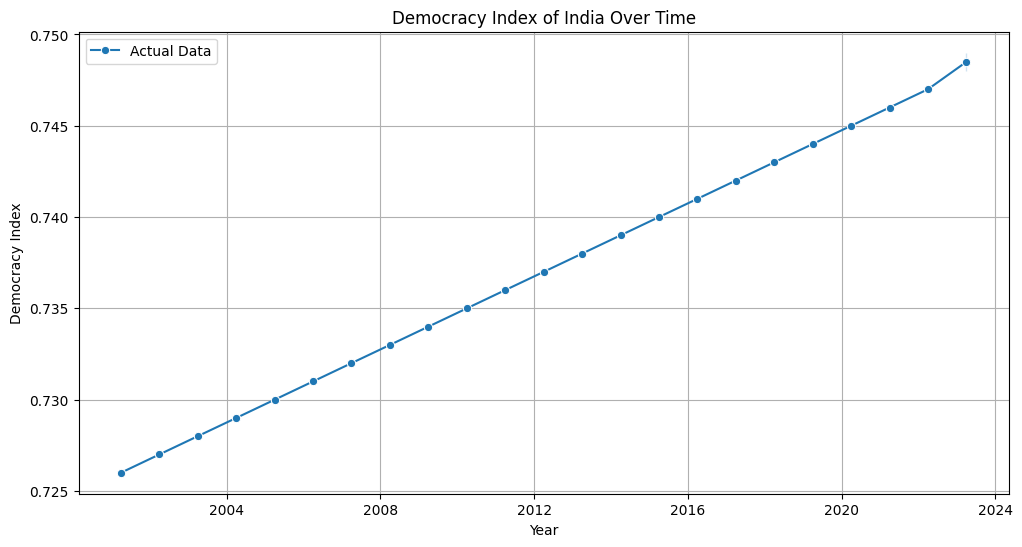

In [ ]:
##Step 3: Visualisasi Data Awal
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_India.index, y=df_India["Democracy Index"], marker="o", label="Actual Data")
plt.title("Democracy Index of India Over Time")
plt.xlabel("Year")
plt.ylabel("Democracy Index")
plt.grid(True)
plt.show()

In [ ]:
# Step 4: Normalisasi Data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df_India[""].values.reshape(-1, 1))

In [ ]:
# Step 5: Membuat Dataset untuk LSTM
def create_sequences(data, time_step=5):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 5
X, y = create_sequences(data_scaled, time_step)

# Ubah dimensi agar sesuai dengan input LSTM
X = X.reshape((X.shape[0], X.shape[1], 1))

In [ ]:
# Step 6:Membagi Data Menjadi Training dan Testing
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
#Step 7: Membangun Model LSTM
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation="relu"),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#Step 8: Melatih Model LSTM
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=16, verbose=1)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - loss: 0.4171 - val_loss: 0.5772
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.3922 - val_loss: 0.5469
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.3745 - val_loss: 0.5311
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 0.3589 - val_loss: 0.5171
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 0.3521 - val_loss: 0.5028
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.3450 - val_loss: 0.4870
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 0.3325 - val_loss: 0.4703
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 0.3207 - val_loss: 0.4530
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.3029 - val_loss: 0.4350
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 0.2916 - val_loss: 0.4163
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.2841 - val_loss: 0.3972
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - loss: 0.2718 - 

# Bagian Baru

# Bagian Baru

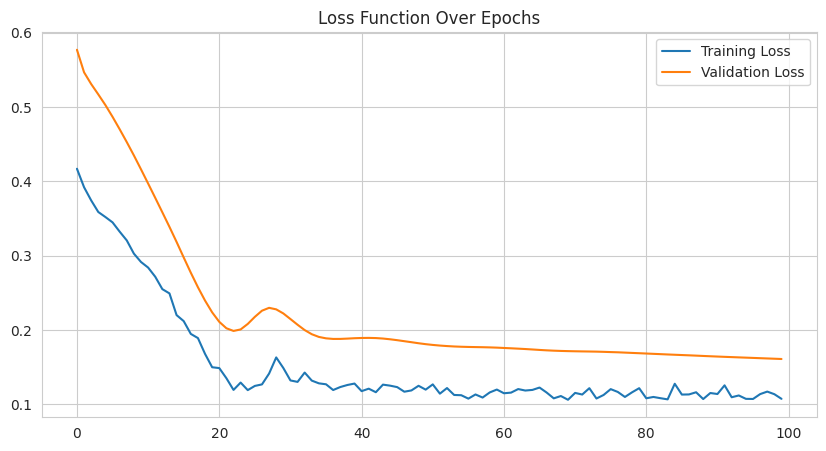

In [ ]:
#Step 9: Evaluasi Model
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.legend()
plt.title("Loss Function Over Epochs")
plt.show()

In [ ]:
# Step 10: Forecasting Next 10 Years dengan Confidence Interval
future_steps = 10
future_inputs = data_scaled[-time_step:].reshape(1, time_step, 1)

# Simulasi Monte Carlo untuk confidence interval
n_simulations = 100
simulation_results = np.zeros((n_simulations, future_steps))

for i in range(n_simulations):
    temp_inputs = future_inputs.copy()
    temp_preds = []

    for _ in range(future_steps):
        future_pred = model(temp_inputs, training=True)  # Enable dropout during prediction
        future_pred = future_pred.numpy().reshape(1, 1, 1)

        temp_preds.append(future_pred[0, 0])
        temp_inputs = np.append(temp_inputs[:, 1:, :], future_pred, axis=1)

    simulation_results[i, :] = np.array(temp_preds).flatten()

# Hitung rata-rata prediksi & confidence interval
predicted_mean = np.mean(simulation_results, axis=0)
lower_bound = np.percentile(simulation_results, 0.5, axis=0)
upper_bound = np.percentile(simulation_results, 99.5, axis=0)

# Transformasi kembali ke skala aslinya
predicted_mean = scaler.inverse_transform(predicted_mean.reshape(-1, 1)).flatten()
lower_bound = scaler.inverse_transform(lower_bound.reshape(-1, 1)).flatten()
upper_bound = scaler.inverse_transform(upper_bound.reshape(-1, 1)).flatten()

# Buat DataFrame hasil forecast
future_years = pd.date_range(start=df_America.index[-1] + pd.DateOffset(years=1), periods=future_steps, freq='YE')
forecast_df_America = pd.DataFrame({
    "Year": future_years,
    "Military expenditure": predicted_mean,
    "Lower Bound": lower_bound,
    "Upper Bound": upper_bound
})

print(forecast_df_America)

        Year  Military expenditure    Lower Bound    Upper Bound
0 2024-12-31         805799.327727  686268.136140  901126.050208
1 2025-12-31         792226.979946  679480.635378  923628.258887
2 2026-12-31         778633.326994  664556.113641  912020.119837
3 2027-12-31         756948.613859  645591.429087  936211.643501
4 2028-12-31         744304.700823  587028.846221  898424.357004
5 2029-12-31         728826.557548  590146.083801  895011.050445
6 2030-12-31         709859.402707  563918.019872  859399.037217
7 2031-12-31         688010.819402  560193.102161  821518.601829
8 2032-12-31         673803.721391  567094.813501  800936.040043
9 2033-12-31         669602.319729  573345.225833  795939.052864


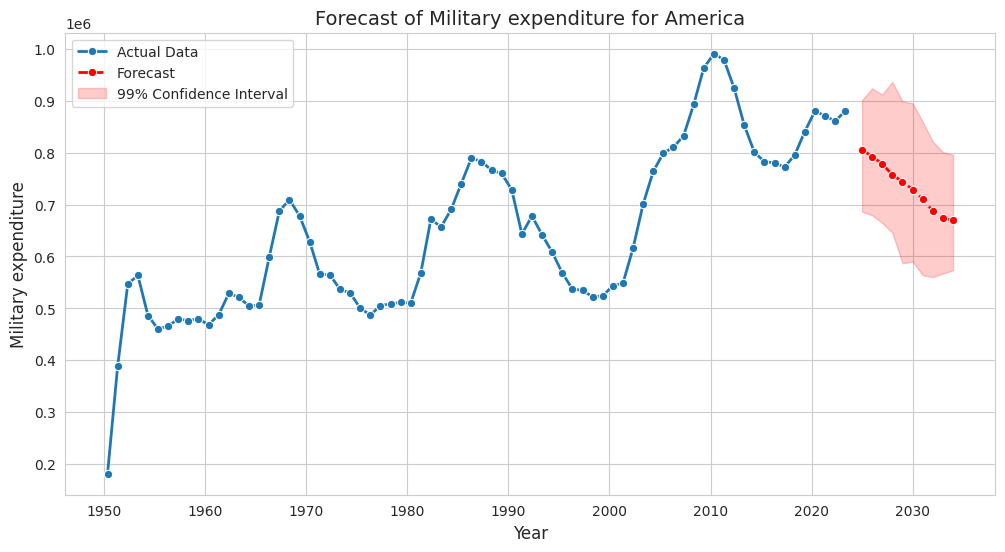

In [ ]:
#Step 11: Visualisasi Hasil Forecasting
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Plot data historis
sns.lineplot(x=df_America.index, y=df_canada["Military expenditure"], marker="o", label="Actual Data", linewidth=2)

# Plot prediksi dengan confidence intervals
sns.lineplot(x=future_years, y=predicted_mean, marker="o", linestyle="dashed", color="red", label="Forecast", linewidth=2)
plt.fill_between(future_years, lower_bound, upper_bound, color='red', alpha=0.2, label="99% Confidence Interval")

# Pengaturan plot
plt.title("Forecast of Military expenditure for America", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Military expenditure", fontsize=12)
plt.legend()
plt.show()

In [ ]:
#Step 12: Menghitung RMSE dan MAPE
predictions =predicted_mean

rmse = np.sqrt(mean_squared_error(df_America["Military expenditure"].iloc[-len(predictions):], predictions.flatten()))
mape = mean_absolute_percentage_error(df_America["Military expenditure"].iloc[-len(predictions):], predictions.flatten()) * 100
A = df_America["Military expenditure"]
B = predictions.flatten()
print(f"Rolling Forecast RMSE: {rmse:.4f}")
print(f"Rolling Forecast MAPE: {mape:.2f}%")

Rolling Forecast RMSE: 125335.4889
Rolling Forecast MAPE: 10.97%


In [ ]:
#Step 13: Menyimpan Hasil ke Excel
output_file = "Military expenditure_forecast_America.xlsx"
forecast_df_America.to_excel(output_file, index=False)

print(f"File saved at: {output_file}")

File saved at: Military expenditure_forecast_America.xlsx
